In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

In [70]:
# Load dataset
file_path = "./data/merged/urls.csv"  # Update with your file path
df = pd.read_csv(file_path)
df.head()

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign


In [71]:
# Handle missing values (fill with mode for categorical, drop if too many missing)
df.fillna(df.mode().iloc[0], inplace=True)

In [72]:
# Remove duplicates
df_before = df.copy()
df.drop_duplicates(inplace=True)

In [73]:
df_before['type'].value_counts()

type
benign        463481
defacement    192914
phishing      104076
malware        44086
spam           12000
Name: count, dtype: int64

In [74]:
df['type'].value_counts()

type
benign        428080
defacement     95308
phishing       94092
malware        23645
spam           11921
Name: count, dtype: int64

In [75]:
# Encode categorical variables
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Just for Visualization stuff later
le2 = LabelEncoder()
df_before['type'] = le2.fit_transform(df_before['type'])

<Figure size 800x500 with 0 Axes>

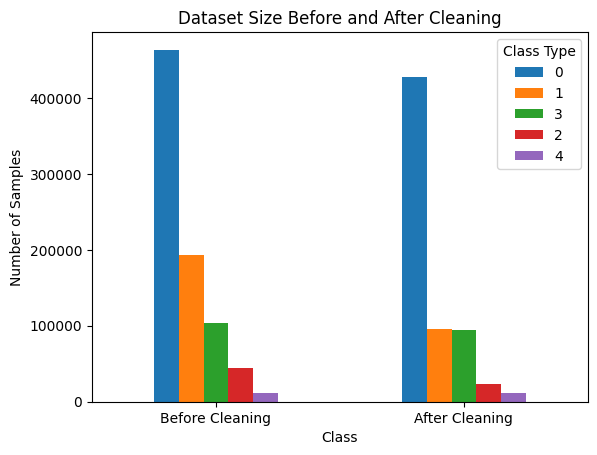

In [76]:
# Visualization of dataset size before and after cleaning
plt.figure(figsize=(8, 5))
data_counts = pd.DataFrame({
    "Before Cleaning": df_before['type'].value_counts(),
    "After Cleaning": df['type'].value_counts()
}).T

data_counts.plot(kind='bar', stacked=False)
plt.title("Dataset Size Before and After Cleaning")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.legend(title="Class Type")
plt.xticks(rotation=0)
plt.show()

In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
# Separate Features and Labels
X = df[["url"]]  # URLs
y = df["type"]    # Classes

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [79]:
# Create Balanced DataFrame
df_balanced = pd.DataFrame({"url": X_resampled["url"], "type": y_resampled})

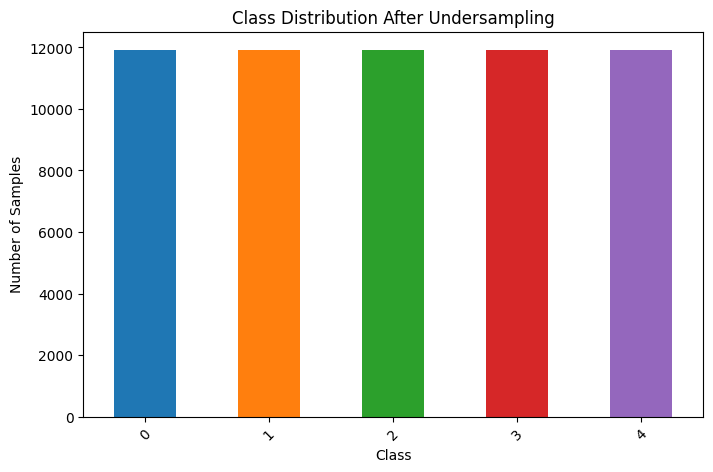

✅ Undersampling completed.


In [80]:
import matplotlib.pyplot as plt

# Get class counts
class_counts = df_balanced["type"].value_counts()

# Use Matplotlib's default color cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Plot Class Distribution After Undersampling
plt.figure(figsize=(8, 5))
class_counts.plot(kind="bar", color=colors[:len(class_counts)])

plt.title("Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)

plt.show()

print("✅ Undersampling completed.")


In [81]:
# Save the balanced dataset
df_balanced.to_csv("./data/merged/cleaned_balanced_data.csv", index=False)